<a href="https://colab.research.google.com/github/2spoorthy/Deep-Learning-Project/blob/main/DeepLearning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to range 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Build the model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.3847 - loss: 1.6726 - val_accuracy: 0.5971 - val_loss: 1.1338
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.6172 - loss: 1.1014 - val_accuracy: 0.6466 - val_loss: 1.0063
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.6820 - loss: 0.9008 - val_accuracy: 0.6645 - val_loss: 0.9667
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.7268 - loss: 0.7689 - val_accuracy: 0.7096 - val_loss: 0.8450
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.7619 - loss: 0.6836 - val_accuracy: 0.7267 - val_loss: 0.8119
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.7912 - loss: 0.5969 - val_accuracy: 0.7188 - val_loss: 0.8518
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.8151 - loss: 0.5225 - val_accuracy: 0.7179 - val_loss: 0.8710
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.8424 -

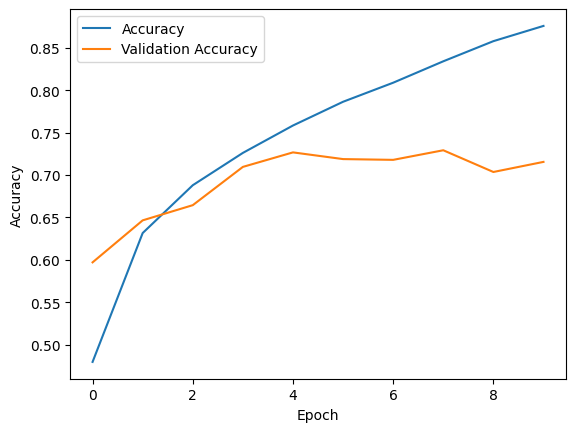

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate model performance
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 3s - 9ms/step - accuracy: 0.7155 - loss: 1.0333

Test accuracy: 0.7155


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


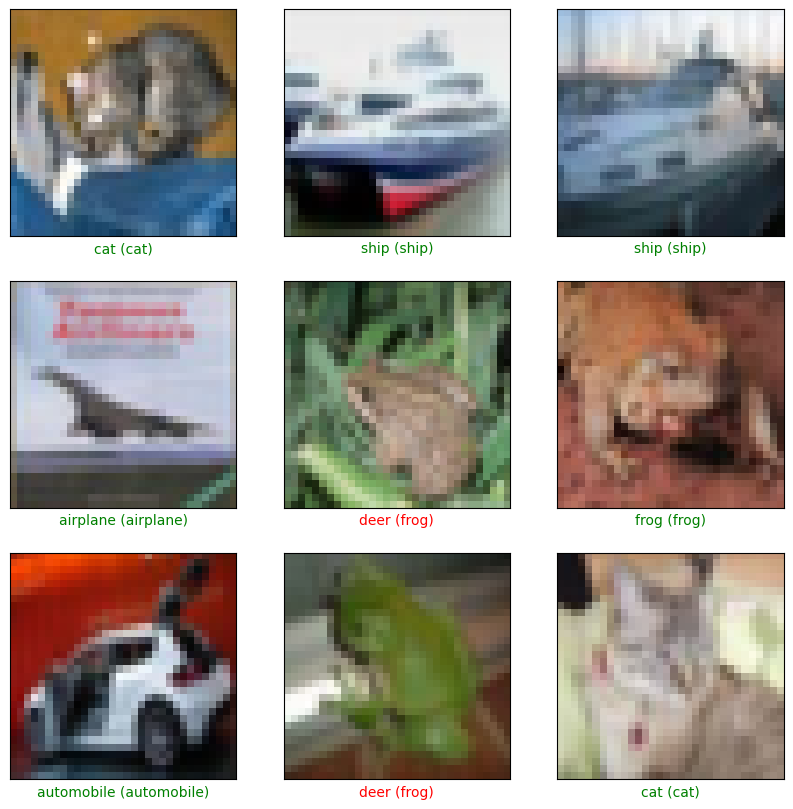

In [ ]:
# Display predictions
num_rows, num_cols = 3, 3
num_images = num_rows * num_cols
plt.figure(figsize=(10,10))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    predicted_label = np.argmax(model.predict(np.expand_dims(x_test[i], axis=0)))
    true_label = y_test[i][0]
    color = 'green' if predicted_label == true_label else 'red'
    plt.xlabel(f'{class_names[predicted_label]} ({class_names[true_label]})', color=color)
plt.show()